# Data analysis and clustering for wine quality data :

Objective : Is to determine # of clusters required for Wine Quality data and plot related graphs to visualize clusters and interpret / make conclusions.

Clustering methods are used to identify groups of similar objects in a multivariate data sets.
They are different types of clustering methods, including:
    1. Partitioning methods
    2. Hierarchical clustering
    3. Fuzzy clustering
    4. Density-based clustering
    5. Model-based clustering
    
We will be using partitioning method(K-Means) to analyze and cluster Wine Quality data set.
    Partitioning algorithms are clustering techniques that subdivide the data sets into a set of k groups, where k is the number of groups pre-specified to initiate clustering.
    Each cluster in K means is represented by the center or means of the data points belonging to the cluster.
    
   As part of clustering we need to ensure goodness of fit exists which makes clustering more effective ( Correct and complete)

In order to groups objects into clusters we require some method for measuring the distances or to find similarities between the objects.  
K-Means algorithm uses Eucledian distance to form clusters.

Below are the list of data preprocessing steps to prepare wine data set for clusting using K-Means
1. K Means cannot handle factorial / text data and hence we need to convert factor variables into integer variables by adding dummy variables 
2. Need to identify columns with zero variance and delete columns with 0 variance 
3. Scaling and centering the data 
4. discover and remove highly correlated variables from the wine data set


In [42]:
# lets import all required libraries to read, Analyze , pre-process , transform , clustering and make conclusions 
rm(list = ls()) ; gc() # remove unused objects in the current working directory and run garbage collector to free memory space
library(dplyr)    # For data manipulation ,filtering etc
library(caret)    # For dummy variables, nearZeroVar(), findCorrleation()
library(ggplot2)  # For plotting
library(vcd)     # For association plots
library(readr)   # read_csv() is fast read facility
library(mclust)
library(cluster) # # clustering algorithms
library(NbClust)  # For deciding # of clusters
library(tidyverse)  # data manipulation
library(factoextra)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2412610,128.9,3886542,207.6,3886542,207.6
Vcells,3610243,27.6,26412190,201.6,68469559,522.4


In [43]:
# Set working directory
setwd("C:\\Users\\vikandul\\Desktop\\BIG DATA - FORE SCHOOL COURSE\\Class Notes and Supporting documentation\\Week_06022018\\clustering\\Excercise")


In [44]:
# read .csv file user read.csv and store it to wine_data data frame.
wine_data<- read.csv("winequality.csv", header=TRUE)

In [45]:
#udertsand the data by retrieving few observations of the data usinf head() or review complete data set using View() function.
head(wine_data)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,good,color
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0,red


In [46]:
# check how many observations and attributes exists in the data set 
dim(wine_data)

[1] 6497   14

In [47]:
# check and derive attribute/ column names of wine data set
# in total wine quality data set have 14 attributes  out of which 11 are of type numeric and 2 attributes are of type integer and one is a factor variable with 2 levels
names(wine_data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "good"                 "color"

In [48]:
# determine data types of each attribute of the wine data set
str(wine_data)

'data.frame':	6497 obs. of  14 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ good                : int  0 0 0 0 0 0 0 1 1 0 ...
 $ color               : Fact

In [49]:

# derive summary statistics for individual attributes if the wine data set using summary()) function
summary(wine_data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

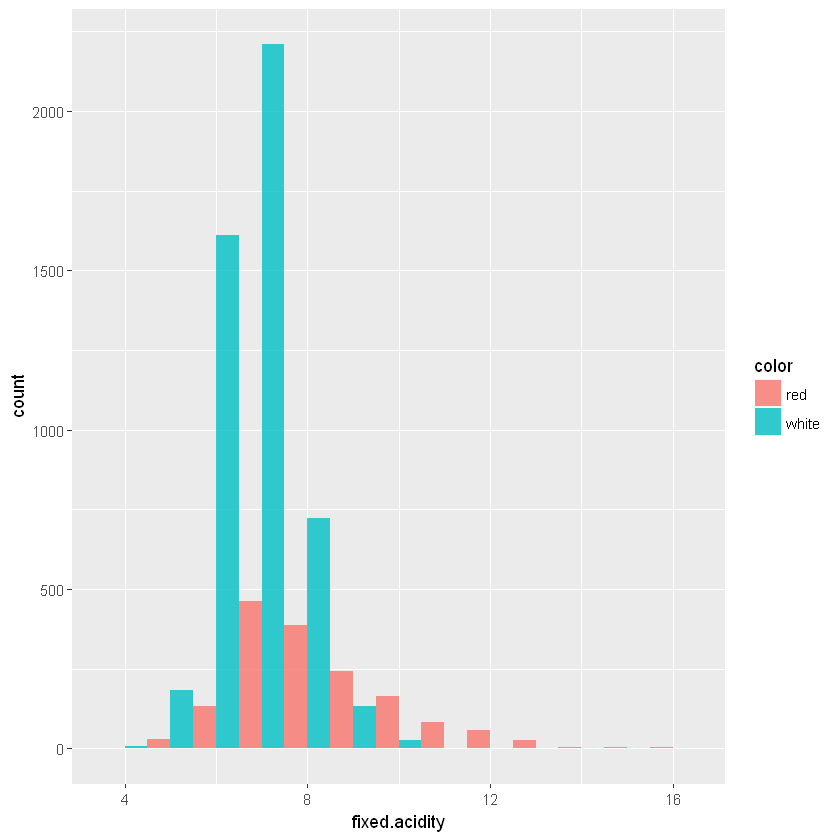

In [50]:
# Lets try to plot some graphs to understand the data better.

# histogram to plot the distribution of continuous attributes of wine data set using a histogram :
#Here are the following attributes considered to plot histogram : 
#attributes fixed.acidity, volatile.acidity, citric.acid, residual sugar  of wine 

ggplot(wine_data, aes(x=fixed.acidity, fill =color))+geom_histogram(alpha=.8, position="dodge", binwidth = 1)





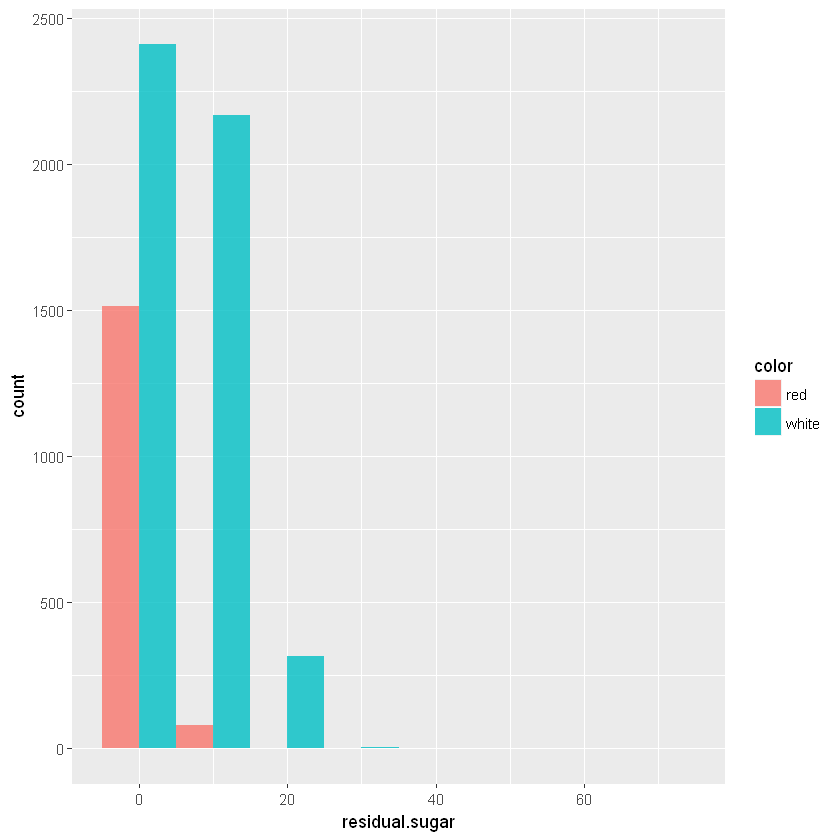

In [51]:
ggplot(wine_data, aes(x=residual.sugar, fill =color))+geom_histogram(alpha=.8, position="dodge", binwidth = 10)

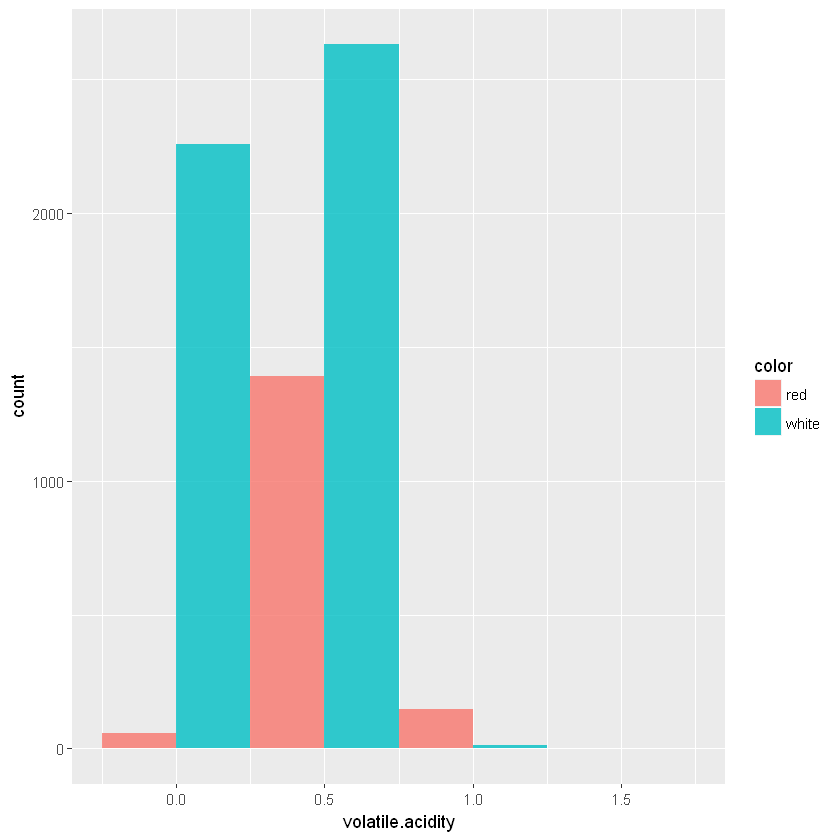

In [52]:
ggplot(wine_data, aes(x=volatile.acidity, fill =color))+geom_histogram(alpha=.8, position="dodge", binwidth = .5)

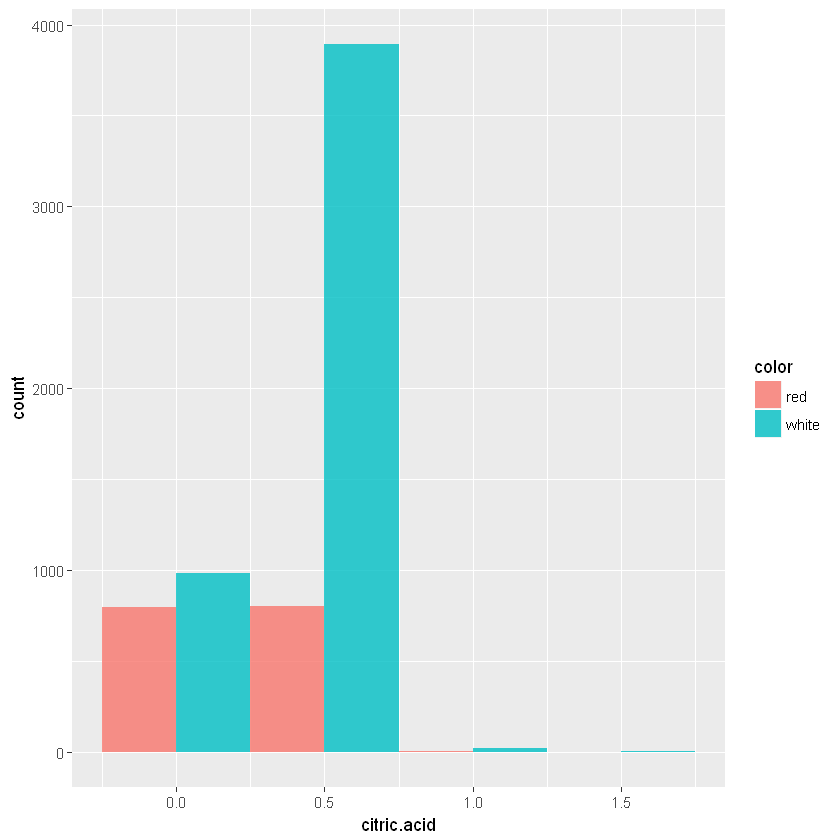

In [53]:
ggplot(wine_data, aes(x=citric.acid, fill =color))+geom_histogram(alpha=.8, position="dodge", binwidth = .5)

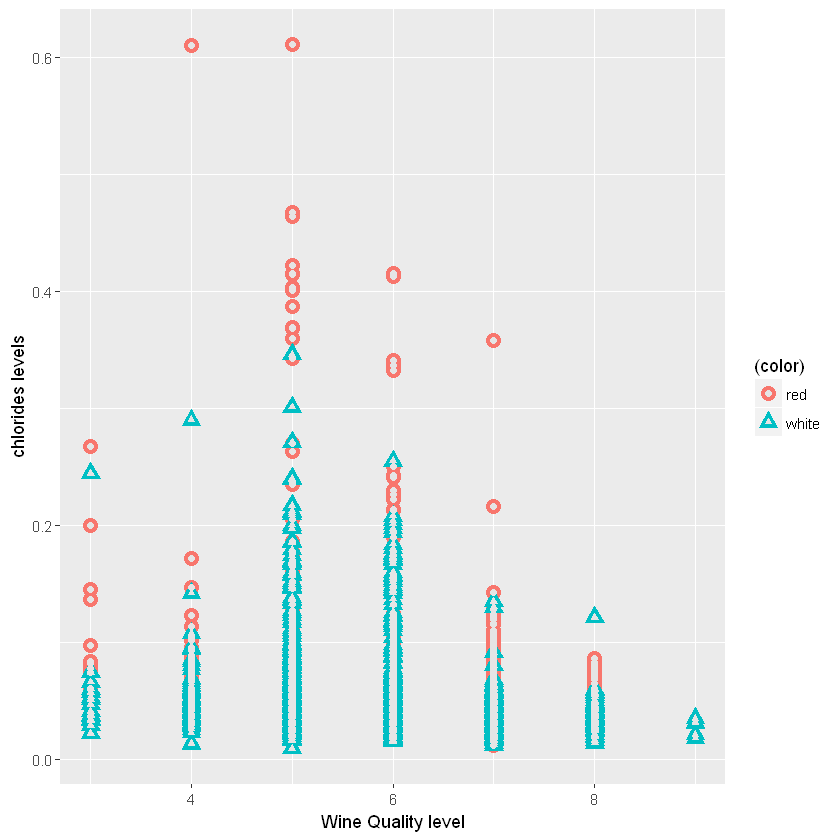

In [54]:
# for each quality level plot  chlorides levels for 2 types of wines(red and white) distinguish by shape 

qc <- ggplot(wine_data, aes( quality,chlorides, shape = (color)))
qc + geom_point(aes(colour = (color)), size = 4) +
  geom_point(colour = "grey90", size = 1.5)+ labs(x="Wine Quality level", y= "chlorides levels")


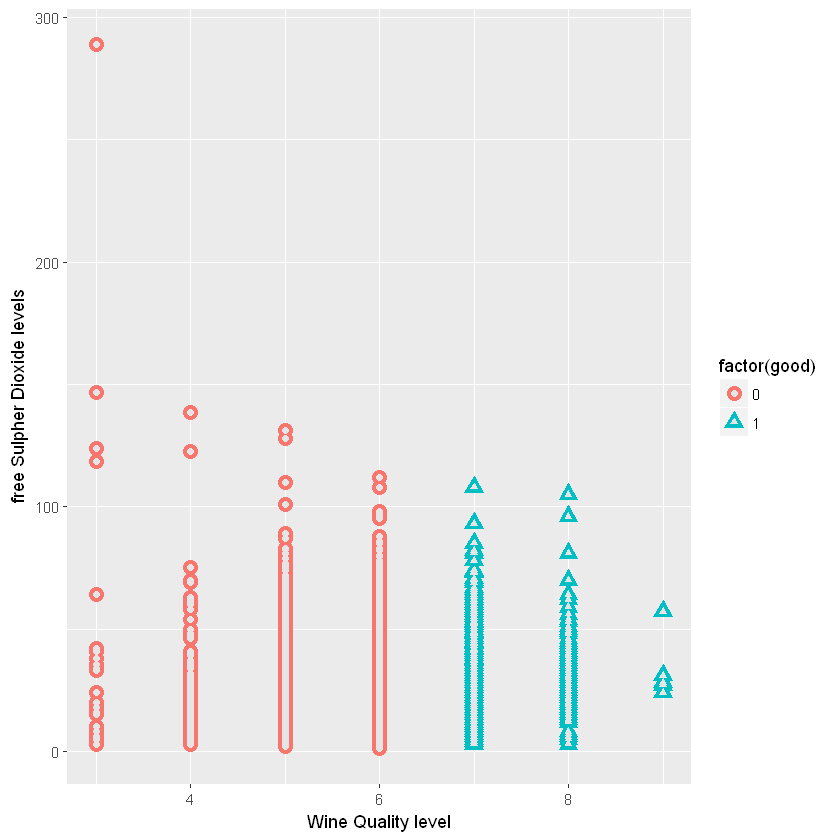

In [55]:
# for each quality level plot  free.sulfur.dioxide levels for 2 types of wines(red and white) distinguish by shape 

fsd <- ggplot(wine_data, aes( quality,free.sulfur.dioxide, shape = factor(good)))
fsd + geom_point(aes(colour = factor(good)), size = 4) +
  geom_point(colour = "grey90", size = 1.5)+ labs(x="Wine Quality level", y= "free Sulpher Dioxide levels")


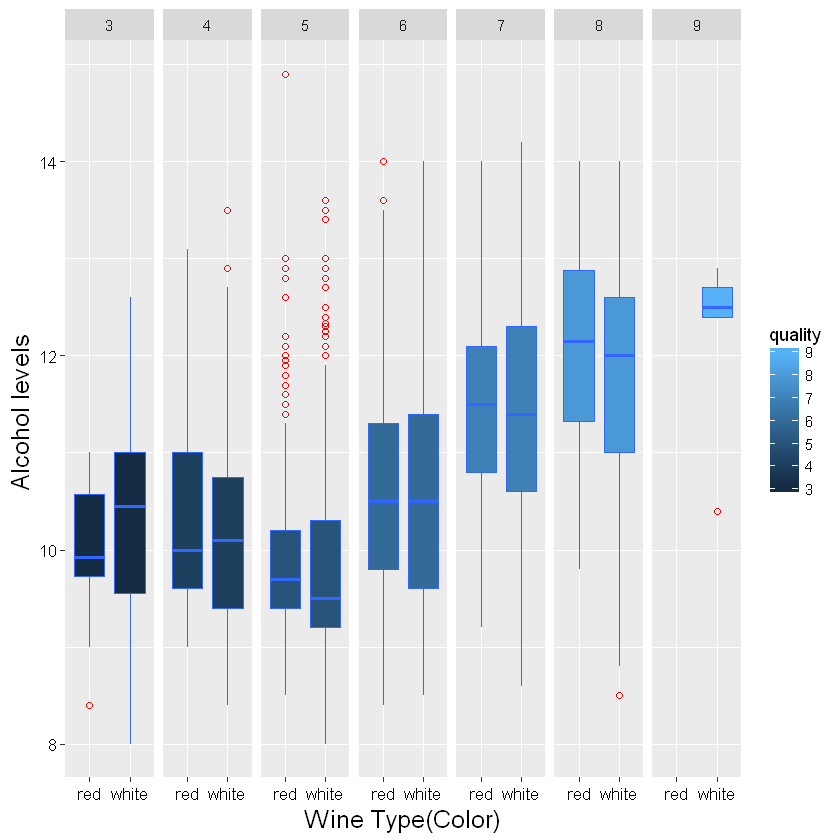

In [56]:
# plot alcohol levels for each quality and color of wine
alc <- ggplot(wine_data, aes(color, alcohol, fill= quality))
alc + geom_boxplot(outlier.colour = "red", outlier.shape = 1,  colour = "#3366FF")+facet_grid(.~quality)+ labs(x = "Wine Type(Color)",
                                                                                                           y = "Alcohol levels ") + 
  theme(axis.title.x = element_text(size=15, colour="black"),
        axis.title.y = element_text(size=15, colour="black"),
        axis.text.x = element_text(size=10, colour ="black"),
        axis.text.y = element_text(size=10, colour ="black")
        )

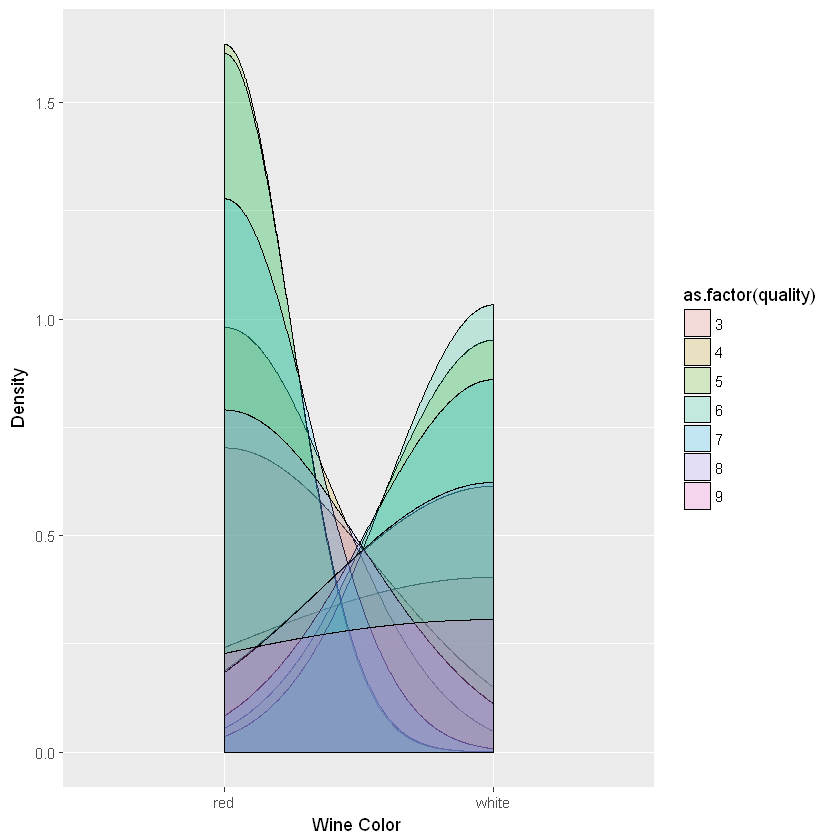

In [57]:
# Plot density graps to visualize color of wine by its quality levels
ggplot(wine_data, aes(x = as.factor(color))) +
  geom_density(aes(fill = as.factor(quality)), alpha = 0.2)+  labs(x="Wine Color ", y= "Density")



# Data Pre-Processing and transformation :

with the help of graphs plotted we now have a better understanding of wine quality data and we can get started with pre-processing steps :

Pre processing and data transformation  steps :
1. validate for null / NA values 
2. identify categorical / numerical values and convert to integer
3. identify attributes with Zero varience
4. normalize the data 
5. Identify attributes with high correlation and remove


In [58]:
# check for Null values 
# Based on the results we see no null values exists in wine data set.
sum(is.na(wine_data))

[1] 0

In [59]:
str(wine_data)

'data.frame':	6497 obs. of  14 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ good                : int  0 0 0 0 0 0 0 1 1 0 ...
 $ color               : Fact

Only color attribute is of type factor and we do not use this attribute for clustering hence no type conversion is required for wine data set.

lets create a copy of wine_data named model_wine_data (excluding color attribute ) which will be leveraged for data transformation and clustering purpose.




In [60]:
model_wine_data<- wine_data[,-14]
str(model_wine_data)


'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ good                : int  0 0 0 0 0 0 0 1 1 0 ...


In [61]:
# identify attributes with zero varience 
nzv <- nearZeroVar(model_wine_data) 
nzv             

# No attributes with zero variance exists in wine data set

integer(0)

In [62]:
summary(model_wine_data)

# attribute like  fixed.acidity, resdual.sugar, free.suifur.dioxide, tota.sulfur.dioxide, alcohol, quality
#     have large values compared to rest of the attributes hence we need to normalize the data 


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [63]:
norm_model_data <- sapply(model_wine_data[,c(1,4,6,7,11,12)], function(x) (x - min(x))/(max(x) - min(x)))
norm_model_data <- data.frame(norm_model_data)    # norm_data is a 'matrix'
head(norm_model_data)
summary(norm_model_data)  
model_wine_data$fixed.acidity  <- norm_model_data$fixed.acidity
model_wine_data$residual.sugar<- norm_model_data$residual.sugar
model_wine_data$free.sulfur.dioxide <- norm_model_data$free.sulfur.dioxide
model_wine_data$total.sulfur.dioxide<- norm_model_data$total.sulfur.dioxide
model_wine_data$alcohol<- norm_model_data$alcohol
model_wine_data$quality<- norm_model_data$quality
                          
head(model_wine_data)                          

fixed.acidity,residual.sugar,free.sulfur.dioxide,total.sulfur.dioxide,alcohol,quality
0.2975207,0.01993865,0.03472222,0.06451613,0.2028986,0.3333333
0.3305785,0.03067485,0.08333333,0.14055300,0.2608696,0.3333333
0.3305785,0.02607362,0.04861111,0.11059908,0.2608696,0.3333333
0.6115702,0.01993865,0.05555556,0.12442396,0.2608696,0.5000000
0.2975207,0.01993865,0.03472222,0.06451613,0.2028986,0.3333333
0.2975207,0.01840491,0.04166667,0.07834101,0.2028986,0.3333333


 fixed.acidity    residual.sugar    free.sulfur.dioxide total.sulfur.dioxide
 Min.   :0.0000   Min.   :0.00000   Min.   :0.00000     Min.   :0.0000      
 1st Qu.:0.2149   1st Qu.:0.01840   1st Qu.:0.05556     1st Qu.:0.1636      
 Median :0.2645   Median :0.03681   Median :0.09722     Median :0.2581      
 Mean   :0.2823   Mean   :0.07428   Mean   :0.10252     Mean   :0.2529      
 3rd Qu.:0.3223   3rd Qu.:0.11503   3rd Qu.:0.13889     3rd Qu.:0.3456      
 Max.   :1.0000   Max.   :1.00000   Max.   :1.00000     Max.   :1.0000      
    alcohol          quality      
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2174   1st Qu.:0.3333  
 Median :0.3333   Median :0.5000  
 Mean   :0.3611   Mean   :0.4697  
 3rd Qu.:0.4783   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000  

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,good
0.2975207,0.70,0.00,0.01993865,0.076,0.03472222,0.06451613,0.9978,3.51,0.56,0.2028986,0.3333333,0
0.3305785,0.88,0.00,0.03067485,0.098,0.08333333,0.14055300,0.9968,3.20,0.68,0.2608696,0.3333333,0
0.3305785,0.76,0.04,0.02607362,0.092,0.04861111,0.11059908,0.9970,3.26,0.65,0.2608696,0.3333333,0
0.6115702,0.28,0.56,0.01993865,0.075,0.05555556,0.12442396,0.9980,3.16,0.58,0.2608696,0.5000000,0
0.2975207,0.70,0.00,0.01993865,0.076,0.03472222,0.06451613,0.9978,3.51,0.56,0.2028986,0.3333333,0
0.2975207,0.66,0.00,0.01840491,0.075,0.04166667,0.07834101,0.9978,3.51,0.56,0.2028986,0.3333333,0


In [64]:
summary(model_wine_data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar   
 Min.   :0.0000   Min.   :0.0800   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2149   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.:0.01840  
 Median :0.2645   Median :0.2900   Median :0.3100   Median :0.03681  
 Mean   :0.2823   Mean   :0.3397   Mean   :0.3186   Mean   :0.07428  
 3rd Qu.:0.3223   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.:0.11503  
 Max.   :1.0000   Max.   :1.5800   Max.   :1.6600   Max.   :1.00000  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :0.00000     Min.   :0.0000       Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.:0.05556     1st Qu.:0.1636       1st Qu.:0.9923  
 Median :0.04700   Median :0.09722     Median :0.2581       Median :0.9949  
 Mean   :0.05603   Mean   :0.10252     Mean   :0.2529       Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.:0.13889     3rd Qu.:0.3456       3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :1.00000     Max.   :1

In [65]:
# find attribute with high correlation index 
highCorr <- findCorrelation(cor(model_wine_data),cutoff = 0.8, verbose = T)

All correlations <= 0.8 


no attribute have correlation >.8 hence we do not see the need to delete any attributes from model_wine_data set

# Clustering using K-Means

As we need to determine the number of clusters before we start clustering the data, lets consider a range or cluster from 1 to 10 and determine within sum of squares distance for each cluster using k-means and build a scree plot to identify  elbow point to derive number of clusters required for wine data set.


In [66]:
# create a empty vector to store sum of square distances within cluster
total_wsos<- c()


In [67]:
# lets to k-means for 10 clusters 
for (i in 1:10)
  {
  wine_cluster<- kmeans(model_wine_data, centers=i)
    total_wsos[i]<- wine_cluster$tot.withinss
    } 
total_wsos

[1] 2234.7822 1094.2483  889.2078  798.4680  750.2071  718.2953  651.1082
 [8]  650.6562  619.0011  584.8826

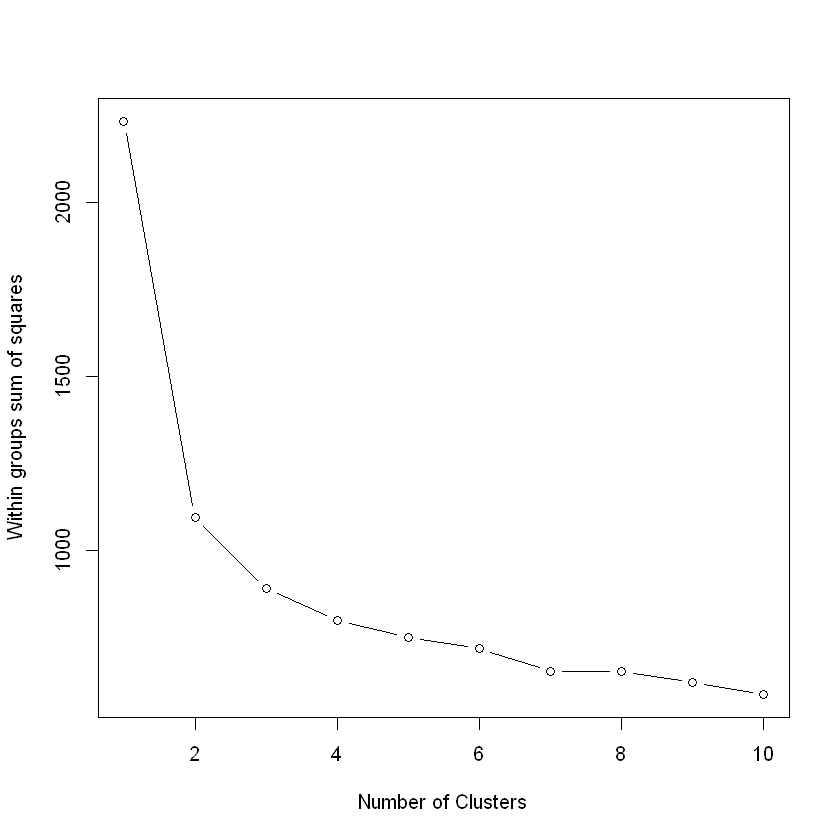

In [68]:
plot(x=1:10,                         # x= No of clusters, 1 to 10
       y=total_wsos,                      # total_wsos for each
       type="b",                       # Draw both points as also connect them
       xlab="Number of Clusters",
       ylab="Within groups sum of squares")  

Based on the scree plot we can determine that after cluster 2 we do not see a huge drop in sum of squared distances within each cluster hence we can consider K value as 2 and proceed with clustering 

# K-Means Segmentation 

In [69]:
k=2
w_cluster = kmeans(model_wine_data, k, iter.max = 140 , algorithm="Lloyd", nstart=100)
w_cluster

K-means clustering with 2 clusters of sizes 1277, 5220

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1     0.2715462        0.2891699   0.3346280     0.06484235 0.04457557
2     0.2848770        0.3520192   0.3147203     0.07659221 0.05883697
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1           0.1043584            0.2393805 0.9930268 3.227651 0.5414879
2           0.1020684            0.2561671 0.9951051 3.216262 0.5287682
    alcohol   quality good
1 0.4975883 0.6931611    1
2 0.3277481 0.4150702    0

Clustering vector:
   [1] 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [77]:
# Within sum of squares by cluster is close ot 51% 
str(w_cluster)


[1] 0.1604794 0.7989381

List of 9
 $ cluster     : int [1:6497] 2 2 2 2 2 2 2 1 1 2 ...
 $ centers     : num [1:2, 1:13] 0.272 0.285 0.289 0.352 0.335 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:13] "fixed.acidity" "volatile.acidity" "citric.acid" "residual.sugar" ...
 $ totss       : num 2235
 $ withinss    : num [1:2] 183 911
 $ tot.withinss: num 1094
 $ betweenss   : num 1141
 $ size        : int [1:2] 1277 5220
 $ iter        : int 3
 $ ifault      : NULL
 - attr(*, "class")= chr "kmeans"


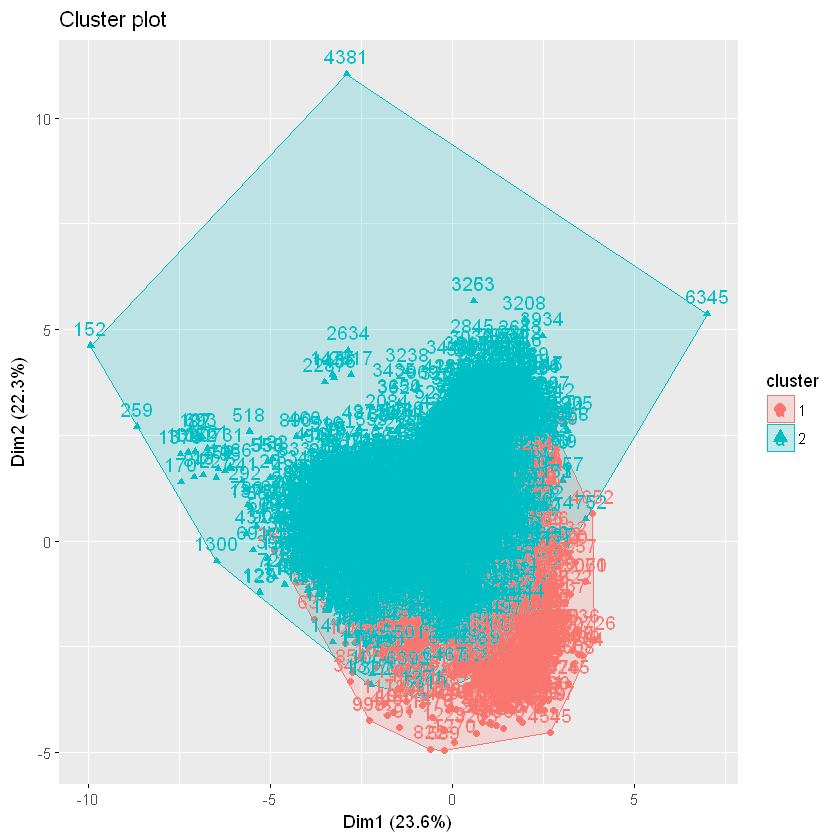

In [71]:
fviz_cluster(w_cluster, data = model_wine_data)


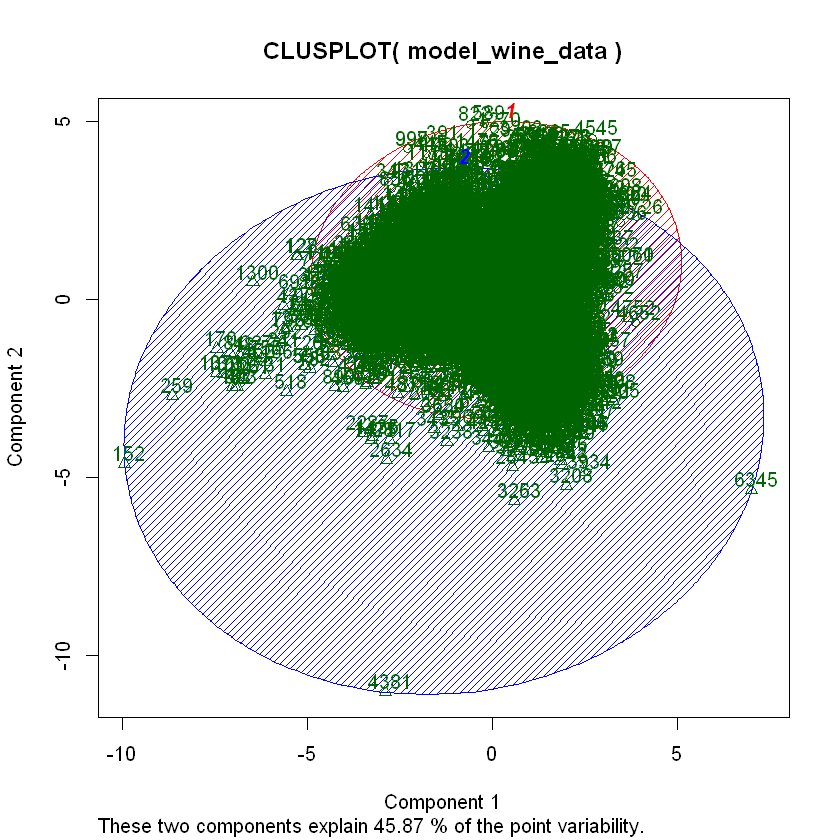

In [72]:
clusplot(model_wine_data, w_cluster$cluster, color=TRUE, shade=TRUE, 
           labels=2, lines=0)

#  Silhoutte coefficients

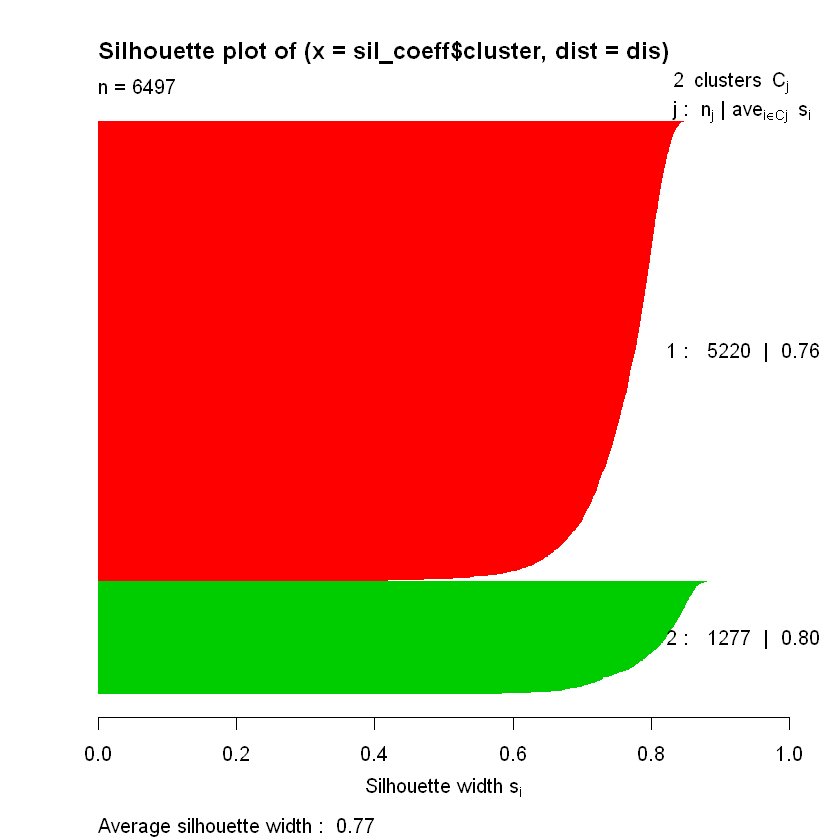

In [73]:
 sil_coeff <- kmeans(model_wine_data, 2)

  dis <- dist(model_wine_data)^2  
  sil = silhouette (sil_coeff$cluster, dis)

  plot(sil, col=2:3, border = NA)

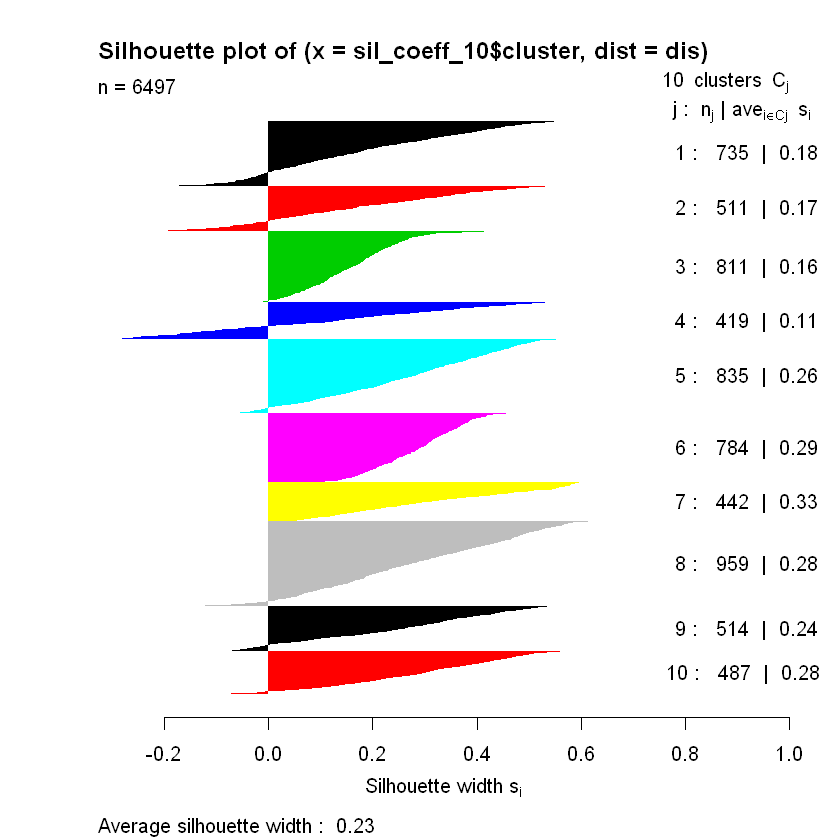

In [74]:
sil_coeff_10 <- kmeans(model_wine_data, 10)

  dis_10 <- dist(model_wine_data)^2  
  sil_10 = silhouette (sil_coeff_10$cluster, dis)

  plot(sil_10, col=1:10, border = NA)

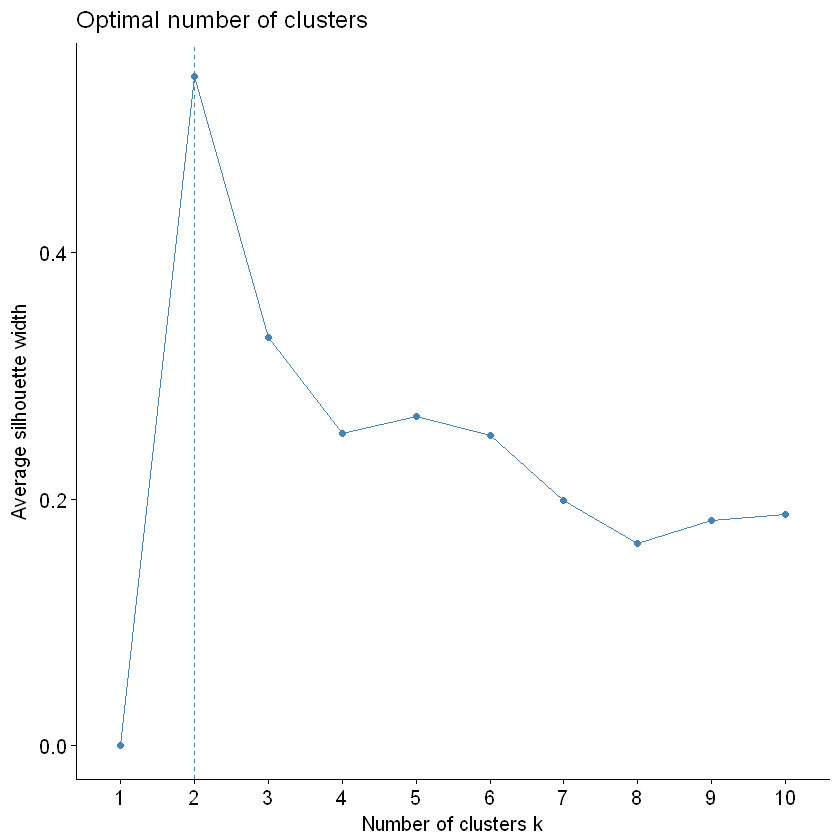

In [76]:
fviz_nbclust(model_wine_data, kmeans, method = "silhouette")

Average silhoutte width for 2 clusters Versus 10 clustes clearly status that 2 clusters is the best we can consider to cluster wine data set and make predictions.